# Information theory
Information theory is a branch of applied mathematics that revolves around quantifying how much information is present in a signal. In the context of machine learning, we can also apply information theory to continuous variables where some of these message length interpretations do not apply.

While probability theory allows us to make uncertain statements and to reason in the presence of uncertainty, information theory enables us to quantify the amount of uncertainty in a probability distribution.

The basic intuition behind the information theory is that a likely event should have low information content, less likely events should have higher information content and independent events should have additive information.

## Self information
Lets say you have a male friend, and he is head over heels in love with this girl, so he asks this girl out pretty much every week and there's a 99% chance she says no, so you being his best friend, he texts you everytime after he asks the girl out to let you know what happened, he texts, "Hey guess what she said, NO 😭😭😭", this is of course wasteful, considering he has a very low chance so it makes more sense for your friend to just send "😭" but if she says yes then he can of course send a longer text, so this way, the number of bits used to convey the message (and your corresponding data bill) will be minimized.

To satisfy these properties, we define the __self-information__ of an event $\mathrm{x} = x$ to be:

$$I(x) = -log \ P(x)$$

We will use `log` to mean the natural logarithm, with base `e`.

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def self_info(my_p):
    return -1*np.log(my_p)

In [4]:
self_info(1)

-0.0

In [5]:
self_info(0.1)

2.3025850929940455

In [6]:
self_info(0.01)

4.605170185988091

In [7]:
self_info(0.5)

0.6931471805599453

In [8]:
self_info(0.5) + self_info(0.5)

1.3862943611198906

Depending on what logarithm base we use, the units of self-information vary. Most frequently, the units are either:

* **nats**: 
    * Natural logarithm, as above with `np.log()` 
    * Typical in ML
* **bits**: 
    * Base-2 logarithm
    * A.k.a. **shannons**
    * Typical in computer science

So, the self-information of $P(x) = 0.1$ is ~2.3 nats.

For example, no matter what combination of toss you get the Entropy remains the same but if you change the probability of the
trial, the entropy changes, play around with the probs and see how the entropy is changing and see if the increase
or decrease makes sense.

In [9]:
coin = np.random.binomial(size=10, n=1, p=0.5) + 1 # Bernoulli distribution, add 1 to make it 1 or 2 instead of 0 or 1 for log function
print(coin)

[1 1 2 2 1 1 1 1 2 1]


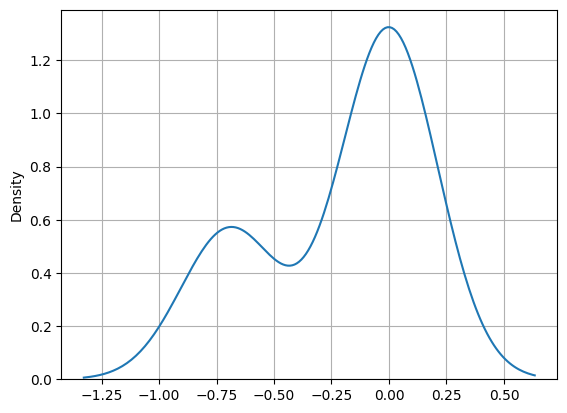

In [10]:
coin_entropy = self_info(coin)
sns.kdeplot(coin_entropy, warn_singular=False)                                            
plt.grid()

## Shannon and Differential Entropy

Self information deals only with a single outcome. To quantify uncertainty about a probability distribution (as opposed to a single event), we can use **Shannon entropy**, which is denoted $H(x)$ or $H(P)$: 
$$ H(x) = \mathbb{E}_{\text{x}\sim P}[I(x)] = -\mathbb{E}_{\text{x}\sim P}[\text{log}P(x)] $$

Conveys the expected informational content associated with an event drawn from the distribution:
* **Low entropy**: 
    * Distribution is ~deterministic and outcomes are ~certain
    * E.g., weighted coin always lands heads up ($P(1)=1$)
* **High entropy**: 
    * Outcomes are uncertain
    * Uniform distribution can be highest entropy
    * E.g., coin is as likely to be heads as tails ($P(0)=P(1)=0.5$)

Shannon entropy of a distribution is the expected amount of information in an event drawn from that distribution. It gives a lower bound on the number of bits needed on average to encode symbols drawn from a distribution P. Distributions that are nearly deterministic (where the outcome is nearly certain) have low entropy; distributions that are closer to uniform have high entropy. When $\mathrm{x}$ is continuous (distribution is PDF), the Shannon entropy is known as the __differential entropy__.

As an example, Shannon entropy for a binary random variable (e.g., coin flip) is: 
$$ (p-1)\text{log}(1-p)-p \text{log}p $$

In [11]:
def binary_entropy(my_p):
    return (my_p-1)*np.log(1-my_p) - my_p*np.log(my_p)

Will throw `nan` with $p=0$ (always tails) or $p=1$ (always heads), but we can get close: 

In [12]:
binary_entropy(0.00001)

0.00012512920464949012

In [13]:
binary_entropy(0.99999)

0.00012512920464901166

In [14]:
binary_entropy(0.9)

0.3250829733914482

In [15]:
binary_entropy(0.5)

0.6931471805599453

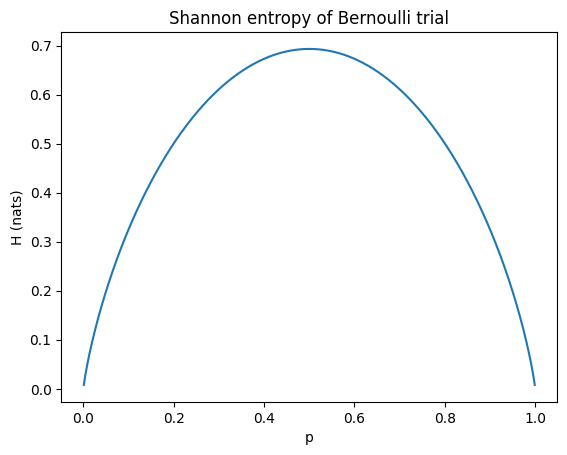

In [16]:
p = np.linspace(0.001, 0.999, 1000) # start, finish, n points
H = binary_entropy(p)

fig, ax = plt.subplots()
plt.title('Shannon entropy of Bernoulli trial')
plt.xlabel('p')
plt.ylabel('H (nats)')
ax.plot(p,H);

Entropy isn't remarkable for its interpretation, but for its properties. For example, entropy doesn't care about the actual *x* values like variance, it only considers their probability. So if we increase the number of values *x* may take then the entropy will increase and the probabilities will be less concentrated.

You can see below by changing the values of x we increase the entropy:

/Users/dima/Development/PyCharmProjects/PythonRetrain/venv/lib/python3.11/site-packages/scipy/stats/_entropy.py:133: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


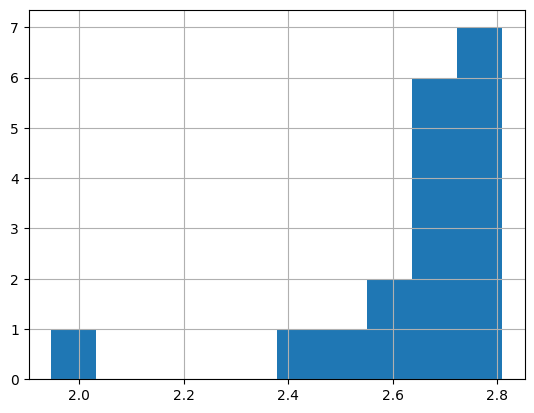

In [17]:
shannon_list = []
np.random.seed(42)
for i in range(1,20):
    uniform_distribution = np.random.randint(low=0, high=i, size=20) # We create a uniform distribution
    shannon_entropy = st.entropy(uniform_distribution)
    shannon_list.append(shannon_entropy)

# Plot of Shannon Entropy
plt.hist(shannon_list)
plt.grid()

## Kullback-Leibler Divergence
**KL divergence** enables us to quantify the relative Shannon (or differential) entropy of two probability distributions that are over the same random variable x.

For example, if we have one probability distribution described by $P(x)$ and another by $Q(x)$, their KL divergence (denoted $D_\text{KL}$) is: 
$$ D_\text{KL}(P||Q) = \mathbb{E}_{\text{x} \sim P}[\text{log}P(x) - \text{log}Q(x)] $$

The KL divergence has many useful properties, most notably being nonnegative. The KL divergence is 0 if and only if P and Q are the same distribution in the case of discrete variables, or equal “almost everywhere” in the case of continuous variables.

### Cross-Entropy
Cross-entropy is a concept derived from KL divergence. Its detail is beyond the scope of this series except to mention that it provides us with the **cross-entropy cost** function. 

This cost function is ubiquitous in neural networks as it's the cost function of choice for predicting discrete, categorical outcomes. E.g., for a binary classifier, the cross-entropy cost ($C$) is: 

$$ C = -(y \cdot \text{log}(\hat{y}) + (1-y) \cdot \text{log}(1-\hat{y})) $$

In [18]:
def cross_entropy(y, a):
    return -1*(y*np.log(a) + (1-y)*np.log(1-a))

In [19]:
cross_entropy(1, 0.9997)

0.00030004500900199243

In [20]:
cross_entropy(1, 0.9)

0.10536051565782628

In [21]:
cross_entropy(1, 0.6)

0.5108256237659907

In [22]:
cross_entropy(1, 0.3)

1.2039728043259361